In [1]:
%matplotlib inline
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from helpers import plotcfg
from helpers import myfunc
from helpers import classic_algorithms
from helpers import preprocessing
from scipy import signal


In [2]:
X, y, d = pickle.load(gzip.open('../data/artificial.pickle', 'rb'), encoding='latin1')

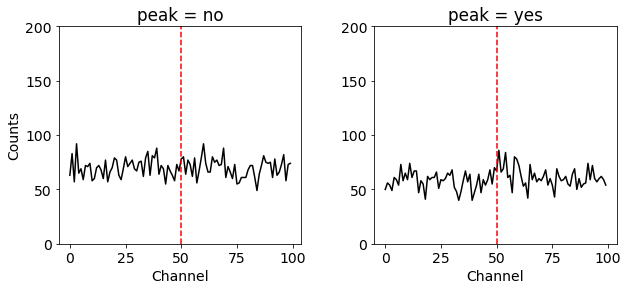

In [21]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(X[0], color='black')
plt.ylim(0,200)
plt.axvline(50, linestyle='--', color='red')
plt.title('peak = no')
plt.ylabel('Counts')
plt.xlabel('Channel')

plt.subplot(1,2,2)
plt.plot(X[4], color='black')
plt.axvline(50, linestyle='--', color='red')
plt.ylim(0,200)
plt.title('peak = yes')
plt.xlabel('Channel')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

In [4]:
sig = X[0]
maxwidth = 5 
widths = np.arange(1, maxwidth)
cwtmatr = signal.cwt(sig, signal.ricker, widths)

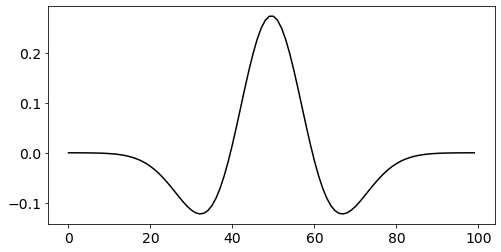

In [19]:
plt.figure(figsize=(8,4))
a = 10
points = 100
vec2 = signal.ricker(points, a)
plt.plot(vec2, color='black')
plt.show()

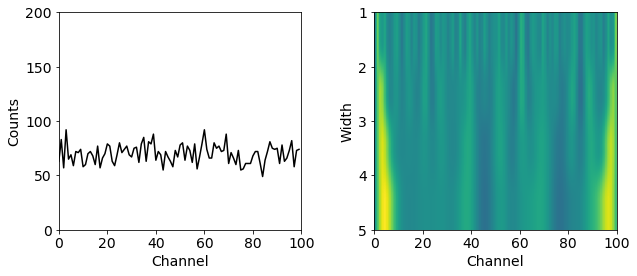

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(sig,  color="black")
plt.xlim(0,100)
plt.ylim(0,200)
plt.ylabel('Counts')
plt.xlabel('Channel')

plt.subplot(1,2,2)
plt.imshow(cwtmatr, extent=[0, 100, maxwidth, 1], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.yticks(np.arange(1,6),np.arange(1,6))
plt.ylabel('Width')
plt.xlabel('Channel')


plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()

In [7]:
forest = RandomForestClassifier()
x_cwt = preprocessing.Cwt().transform(X)
forest.fit(x_cwt, y)
importances = forest.feature_importances_

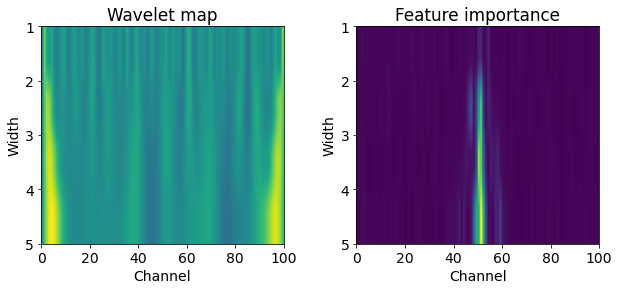

In [13]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cwtmatr, extent=[0, 100, maxwidth, 1], cmap='viridis', aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.yticks(np.arange(1,6),np.arange(1,6))
plt.ylabel('Width')
plt.xlabel('Channel')
plt.title('Wavelet map')

plt.subplot(1,2,2)
plt.imshow(importances.reshape(cwtmatr.shape), extent=[0, 100, maxwidth, 1], cmap='viridis', aspect='auto',
           vmax=importances.max(), vmin=importances.min())

plt.ylabel('Width')
plt.xlabel('Channel')
plt.title('Feature importance')

plt.subplots_adjust(wspace=0.3, hspace=0.4)
plt.show()